In [21]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
def fetch_blockchain_data(address):
    api_key = "T6GJEDXT4RKJXWT8IP3JV2HW1VDJPQX45A"
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&page=1&offset=10&sort=asc&apikey={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data['result']
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

ethereum_address = "0x7F462b844097837f4A5ee4f515f2E9a99d0E1Be1"
transactions_data = fetch_blockchain_data(ethereum_address)

In [23]:
if transactions_data:
    print("Recent Transactions:")
    for i, tx in enumerate(transactions_data[:5]):  # Prints first 5 transactions
        print(f"{i + 1}. Time: {datetime.utcfromtimestamp(int(tx['timeStamp'])).strftime('%Y-%m-%d %H:%M:%S')}, Ether(ETH) Value: {float(tx['value']) / 1e18} ETH, Gas paid: {float(tx['gasPrice']) / 1e18} ETH")

Recent Transactions:
1. Time: 2024-01-29 11:50:23, Ether(ETH) Value: 0.000705585591942213 ETH, Gas paid: 1.2445863858e-08 ETH
2. Time: 2024-01-29 11:56:35, Ether(ETH) Value: 0.000176794017290455 ETH, Gas paid: 1.4754081044e-08 ETH
3. Time: 2024-01-29 12:10:11, Ether(ETH) Value: 0.000529193861351208 ETH, Gas paid: 1.4096260026e-08 ETH
4. Time: 2024-01-29 12:11:35, Ether(ETH) Value: 0.0 ETH, Gas paid: 1.3287018951e-08 ETH
5. Time: 2024-01-29 12:14:59, Ether(ETH) Value: 0.000255932786755037 ETH, Gas paid: 1.2901288841e-08 ETH


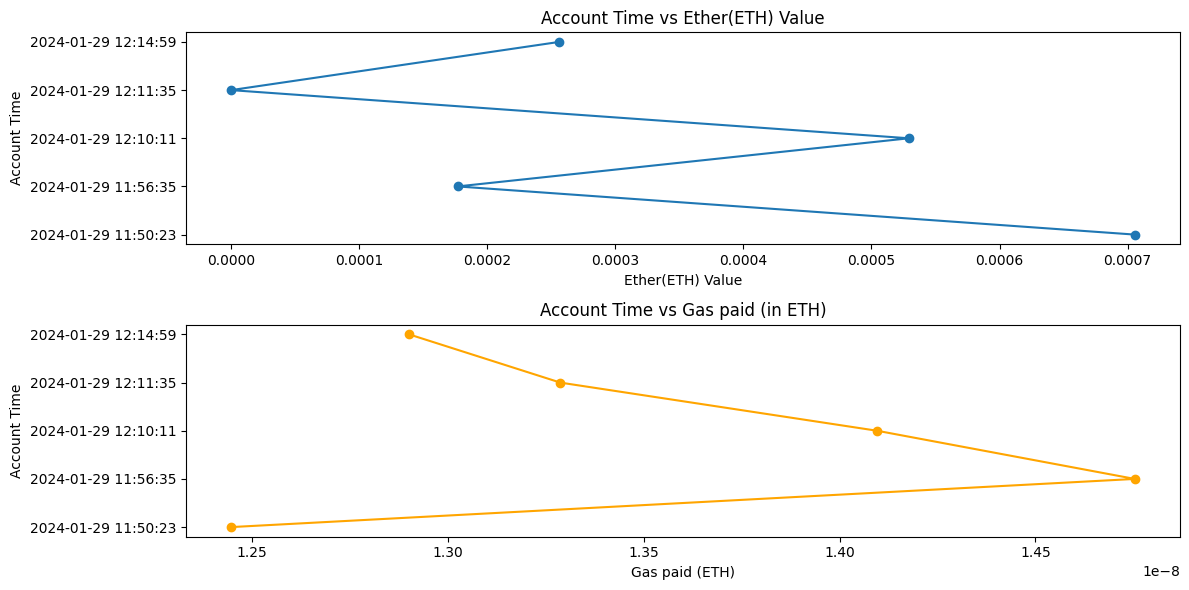

In [28]:
def plot_account_time_vs_value_and_gas(transactions):
    account_times = []
    ether_values = []
    gas_paid_values = []

    for tx in transactions:
        timestamp = int(tx['timeStamp'])
        ether_value = float(tx['value']) / 1e18  # Convert Wei to Ether
        gas_price = float(tx['gasPrice']) / 1e18  # Convert Wei to Ether

        account_times.append(datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
        ether_values.append(ether_value)
        gas_paid_values.append(gas_price)

    # Account Time vs Ether(ETH) Value
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(ether_values, account_times, marker='o')
    plt.title('Account Time vs Ether(ETH) Value')
    plt.xlabel('Ether(ETH) Value')
    plt.ylabel('Account Time')

    # Account Time vs Gas paid (in ETH)
    plt.subplot(2, 1, 2)
    plt.plot(gas_paid_values, account_times, marker='o', color='orange')
    plt.title('Account Time vs Gas paid (in ETH)')
    plt.xlabel('Gas paid (ETH)')
    plt.ylabel('Account Time')

    plt.tight_layout()
    plt.show()

plot_account_time_vs_value_and_gas(transactions_data)